In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cnx = sqlite3.connect('/home/nate/Desktop/fires/FPA_FOD_20170508.sqlite')

In [3]:
df = pd.read_sql_query("SELECT STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE FROM 'Fires'", cnx)

In [4]:
df['DATE'] = pd.to_datetime(df['DISCOVERY_DATE'] - pd.Timestamp(0).to_julian_date(), unit='D')

In [5]:
df['MONTH'] = pd.DatetimeIndex(df['DATE']).month
df['YEAR'] = pd.DatetimeIndex(df['DATE']).year
df['DAY_OF_WEEK'] = df['DATE'].dt.weekday_name

In [6]:
df.head()

,STAT_CAUSE_DESCR,LATITUDE,LONGITUDE,STATE,DISCOVERY_DATE,FIRE_SIZE,DATE,MONTH,YEAR,DAY_OF_WEEK
0,Miscellaneous,40.036944,-121.005833,CA,2453403.5,0.10,2005-02-02,2,2005,Wednesday
1,Lightning,38.933056,-120.404444,CA,2453137.5,0.25,2004-05-12,5,2004,Wednesday
2,Debris Burning,38.984167,-120.735556,CA,2453156.5,0.10,2004-05-31,5,2004,Monday
3,Lightning,38.559167,-119.913333,CA,2453184.5,0.10,2004-06-28,6,2004,Monday
4,Lightning,38.559167,-119.933056,CA,2453184.5,0.10,2004-06-28,6,2004,Monday


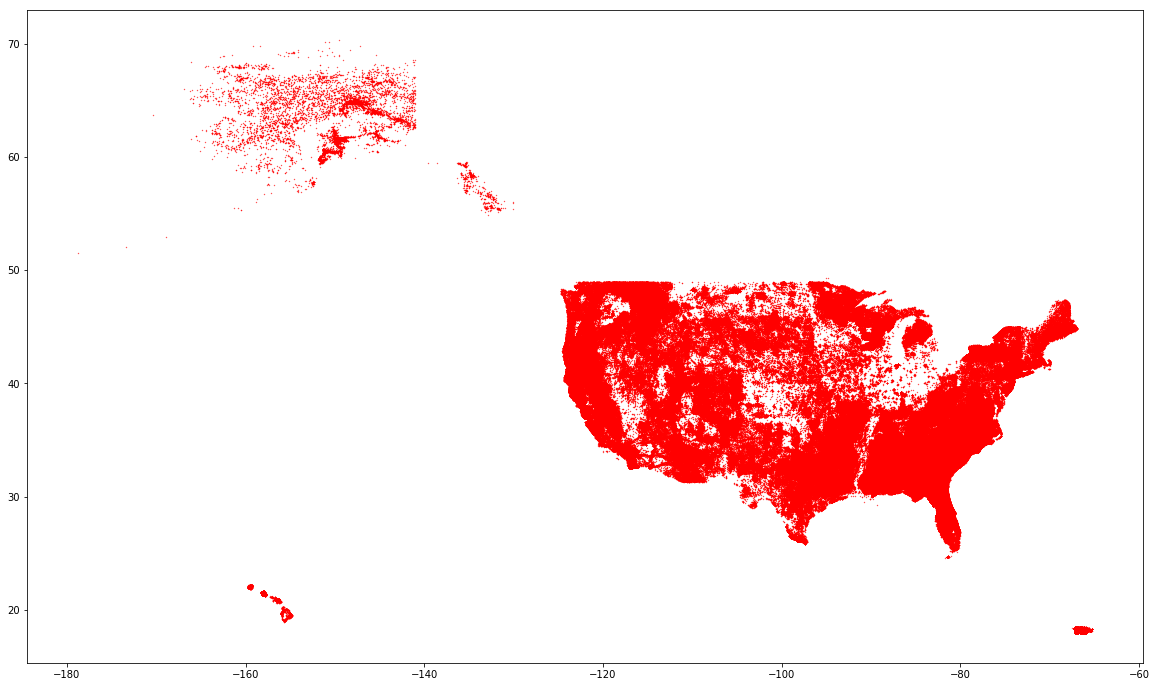

In [7]:
plt.figure(figsize=(20,12))

x=df['LONGITUDE']
y=df['LATITUDE']

plt.scatter(x,y,color='r',s=0.1)

plt.show()

In [8]:
df_over10 = df[df['FIRE_SIZE'] > 10]

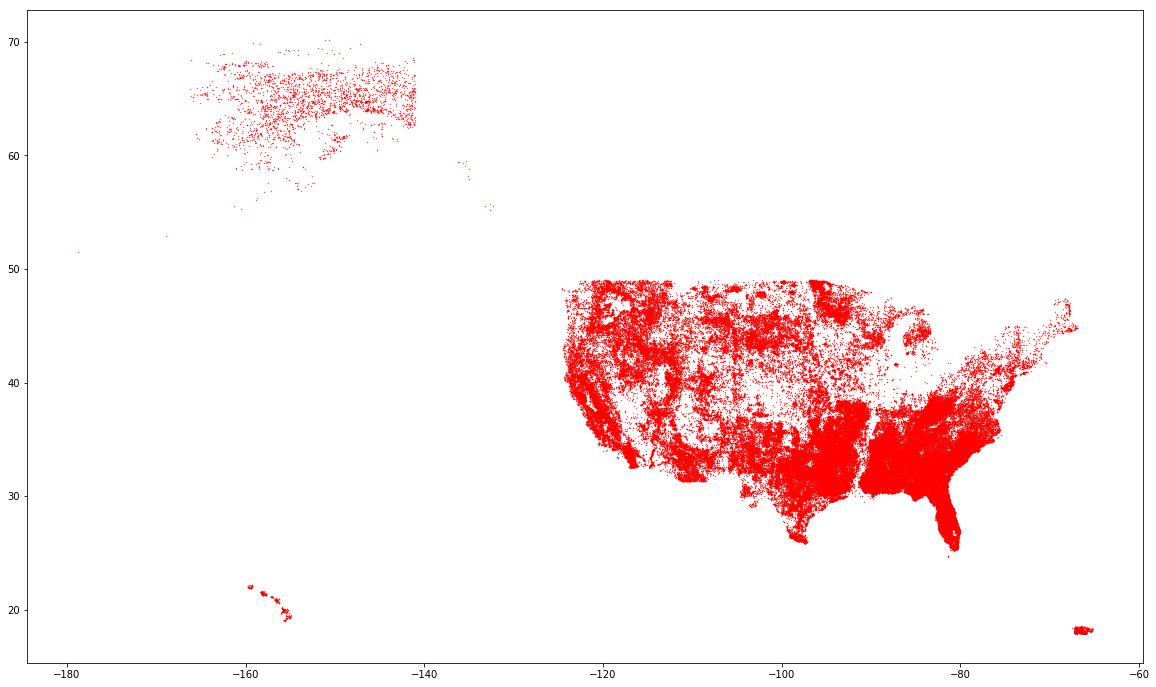

In [9]:
plt.figure(figsize=(20,12))

x=df_over10['LONGITUDE']
y=df_over10['LATITUDE']

plt.scatter(x,y,color='r',s=0.1)

plt.show()

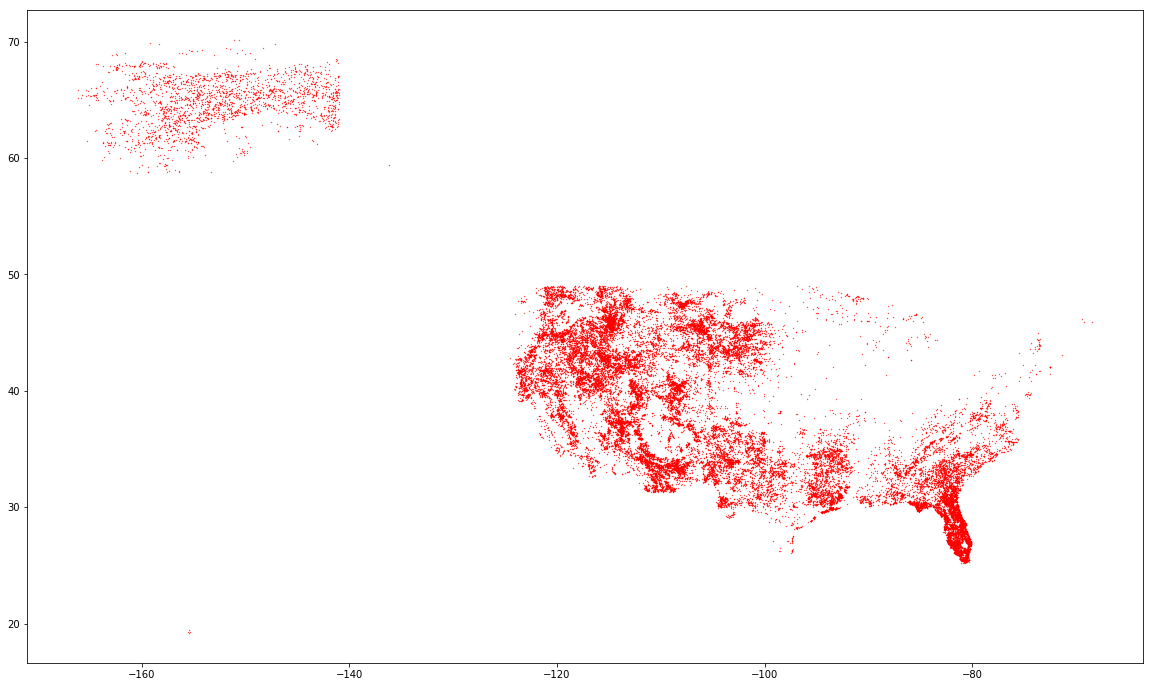

In [10]:
plt.figure(figsize=(20,12))

x=df_over10[df_over10['STAT_CAUSE_DESCR'] == 'Lightning']['LONGITUDE']
y=df_over10[df_over10['STAT_CAUSE_DESCR'] == 'Lightning']['LATITUDE']

plt.scatter(x,y,color='r',s=0.1)

plt.show()

# Stations

In [11]:
stations = pd.read_pickle('murica_stations.pkl')

In [2]:
# stations = pd.read_csv('/home/nate/Desktop/fires/stations.csv', delim_whitespace=True, names=[0])

# stations['idx'] = stations.index
# stations.head()

# stations.iloc[0][1][0]

# code = []
# lat = []
# lon = []
# for idx, row in stations.iterrows():
#     code.append(row[1][0])
#     lat.append(row[1][1])
#     lon.append(row[1][2])

# clean_stations = pd.DataFrame(code, columns=['code'])

# clean_stations['lat'] = lat
# clean_stations['lon'] = lon

# clean_stations.head()

# plt.figure(figsize=(20,12))

# x=clean_stations['lon']
# y=clean_stations['lat']

# plt.scatter(x,y,color='g',s=0.1)

# plt.show()

# accept_stations = []

# for idx, row in clean_stations.iterrows():
#     if row[2] < -60:
#         if row[1] > 15:
#             accept_stations.append(idx)
#     else:
#         pass

# len(accept_stations)

# murica_stations = pd.DataFrame(columns=['code', 'lat', 'lon'])

# murica_lon = []
# murica_lat = []
# murica_code = []

# for idx, row in clean_stations.iterrows():
#     if idx in accept_stations:
#         murica_lon.append(clean_stations.iloc[idx][2])
#         murica_lat.append(clean_stations.iloc[idx][1])
#         murica_code.append(clean_stations.iloc[idx][0])

# len(murica_lon)

# murica_stations['code'] = murica_code
# murica_stations['lat'] = murica_lat
# murica_stations['lon'] = murica_lon

# len(murica_stations)

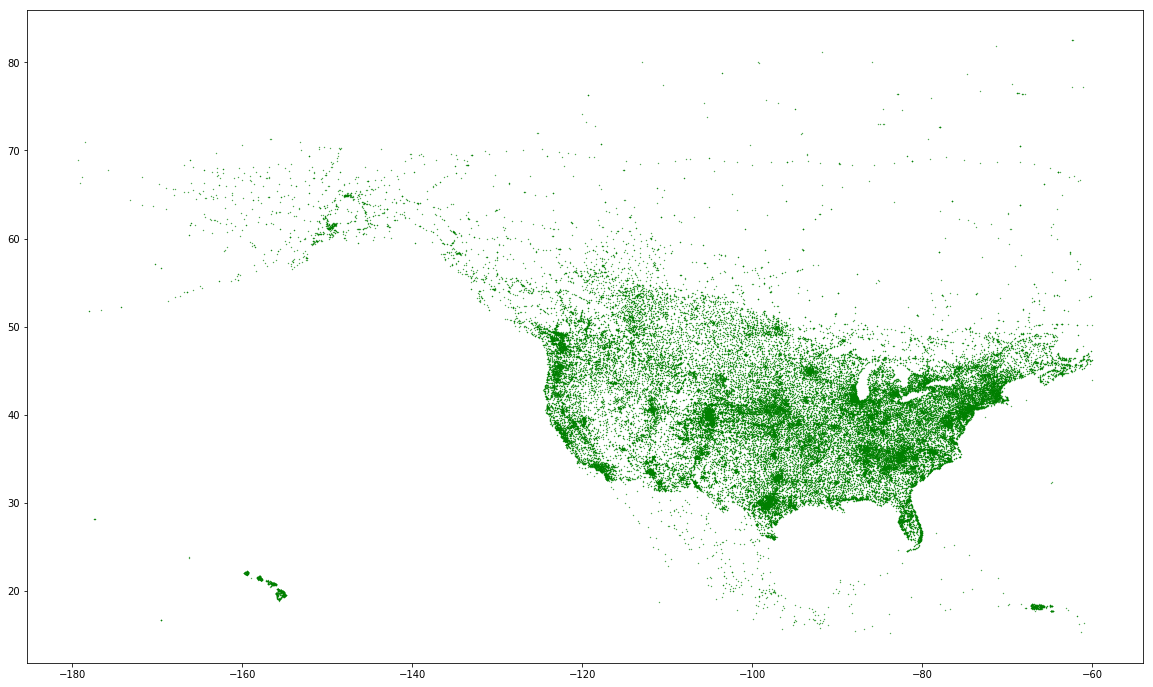

In [12]:
plt.figure(figsize=(20,12))

x=stations['lon']
y=stations['lat']

plt.scatter(x,y,color='g',s=0.1)

plt.show()

# More Fire

In [13]:
df_orig = df.copy()

In [29]:
df_orig = df_orig[df_orig['STATE'] == 'AK']
df_orig_big = df_orig[df_orig['FIRE_SIZE'] > 100]

In [30]:
# import pickle
# pickle_out = open('ak_fires.pkl', 'wb')
# pickle.dump(df_orig, pickle_out)
# pickle_out.close()

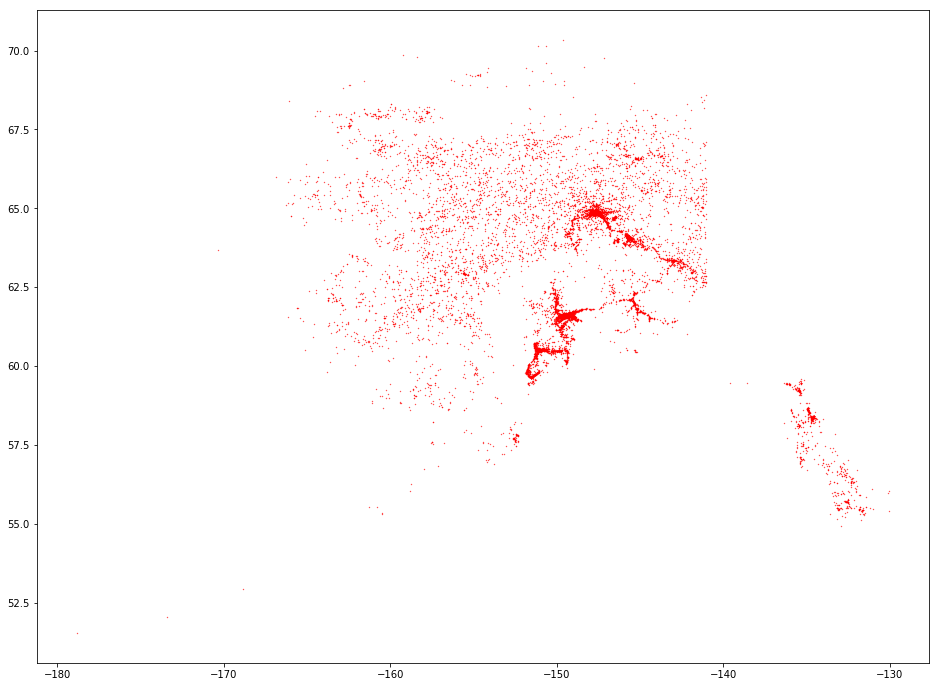

In [16]:
plt.figure(figsize=(16,12))

x=df_orig['LONGITUDE']
y=df_orig['LATITUDE']

plt.scatter(x,y,color='r',s=0.1)

plt.show()

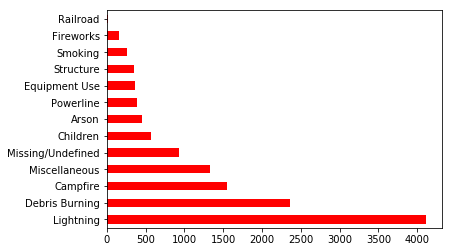

In [17]:
df_orig['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='r')
plt.show()

<Container object of 24 artists>

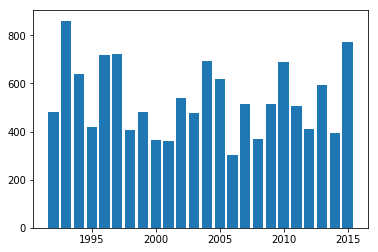

In [18]:
years = pd.Series.to_frame(df_orig['YEAR'].value_counts()).sort_index()

plt.bar(years.index, years['YEAR'])

In [19]:
mth = list(df_orig['MONTH'])
yr = list(df_orig['YEAR'])

mthyr = []
for idx, m in enumerate(mth):
    mthyr.append(str(yr[idx]) + '-' + str(mth[idx]))

df_orig['MTHYR'] = mthyr

<Container object of 206 artists>

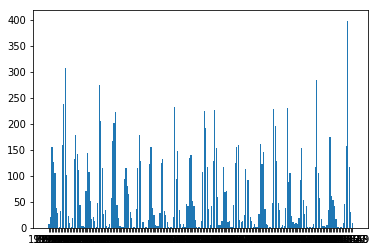

In [20]:
mthyears = pd.Series.to_frame(df_orig['MTHYR'].value_counts()).sort_index()

plt.bar(mthyears.index, mthyears['MTHYR'])

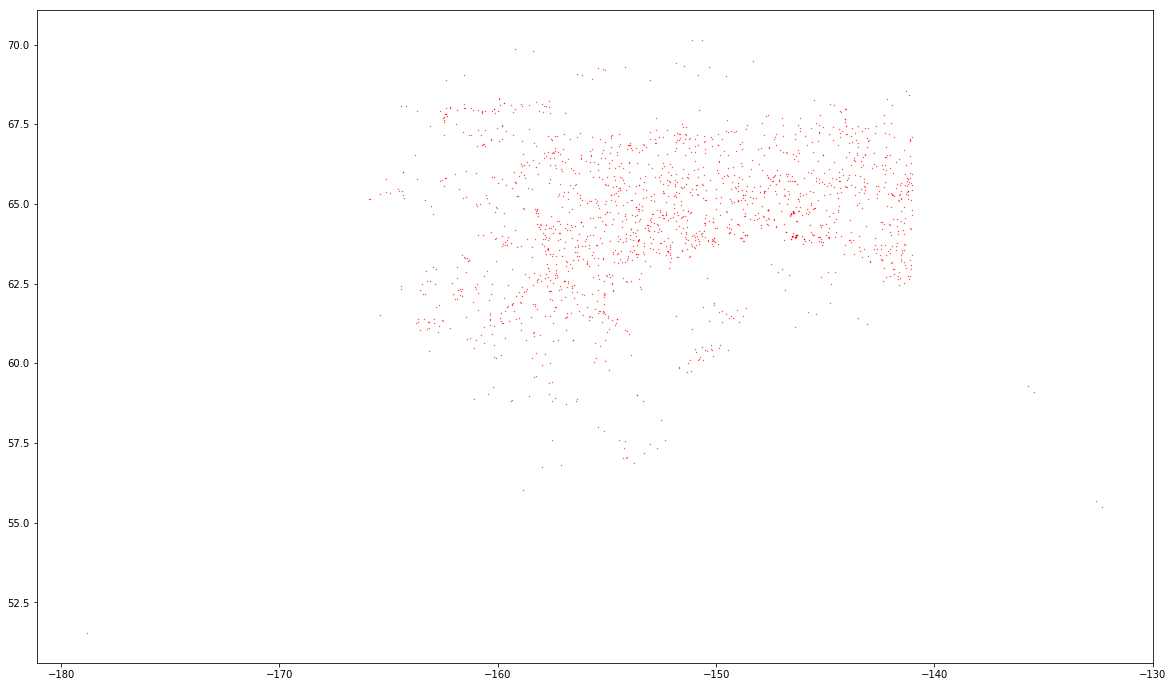

In [21]:
plt.figure(figsize=(20,12))

x=df_orig_big['LONGITUDE']
y=df_orig_big['LATITUDE']

plt.scatter(x,y,color='r',s=0.1)

plt.show()

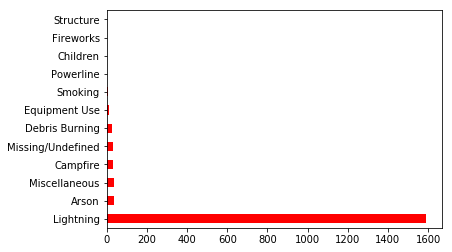

In [22]:
df_orig_big['STAT_CAUSE_DESCR'].value_counts().plot(kind='barh',color='r')
plt.show()

<Container object of 24 artists>

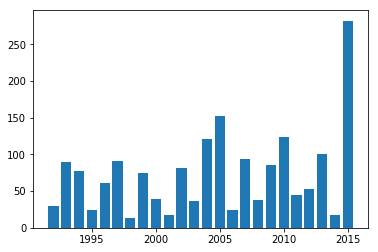

In [23]:
years = pd.Series.to_frame(df_orig_big['YEAR'].value_counts()).sort_index()

plt.bar(years.index, years['YEAR'])

In [24]:
mth = list(df_orig_big['MONTH'])
yr = list(df_orig_big['YEAR'])

mthyr = []
for idx, m in enumerate(mth):
    mthyr.append(str(yr[idx]) + '-' + str(mth[idx]))

df_orig_big['MTHYR'] = mthyr

/home/nate/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<Container object of 110 artists>

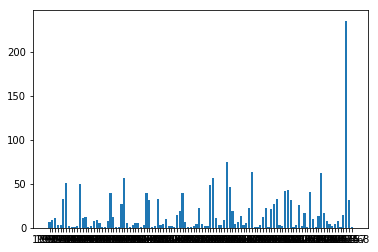

In [25]:
mthyears = pd.Series.to_frame(df_orig_big['MTHYR'].value_counts()).sort_index()

plt.bar(mthyears.index, mthyears['MTHYR'])

<Container object of 24 artists>

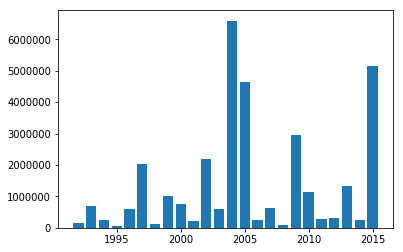

In [26]:
plt.bar(df_orig.groupby('YEAR').sum().index, df_orig.groupby('YEAR').sum()['FIRE_SIZE'])

<Container object of 24 artists>

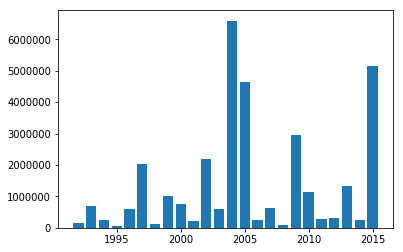

In [27]:
plt.bar(df_orig_big.groupby('YEAR').sum().index, df_orig_big.groupby('YEAR').sum()['FIRE_SIZE'])

In [28]:
np.mean((df_orig.groupby('YEAR').sum()['FIRE_SIZE'] - df_orig_big.groupby('YEAR').sum()['FIRE_SIZE'])/df_orig.groupby('YEAR').sum()['FIRE_SIZE'])

0.005041924032120097

on average, fires less than 100 acres in size in AK account half a percent of the area burned in a given year, max is ~3.3% in 1995